<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
import keras
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from sklearn.preprocessing import normalize

Using TensorFlow backend.


In [2]:
# Load the data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
# Shapes of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
# Normalize the data
X_train = normalize(X_train)
X_test = normalize(X_test)


In [28]:
# instantiate the model and adding layers
model = Sequential()
# Input
model.add(Dense(1, input_dim=13, activation='sigmoid'))
# hidden
# model.add(Dense(15, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
# Output
model.add(Dense(1, activation='linear'))
# Compile
model.compile(optimizer='adam',
              loss="mean_squared_error",
              metrics=['mean_squared_error'])
# Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 14        
_________________________________________________________________
dense_5 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_6 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 16        
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Hyperparams
batch_size= 50
epochs = 4000

In [31]:
# fit the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=0)
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

102/102 [==============================] - 0s 23us/step
mean_squared_error: 2655.428658279718


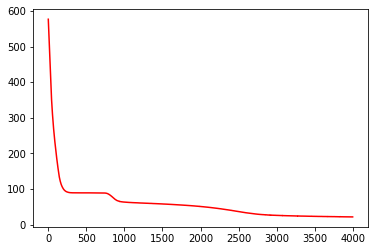

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='r')

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [37]:
from keras.datasets import fashion_mnist
import keras

train, test = fashion_mnist.load_data()

In [38]:
epochs = 25
batch_size = 42
num_classes = 10

In [39]:
X_train = train[0]
y_train = train[1]
X_test = test[0]
y_test = test[1]

In [40]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [41]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [46]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, input_dim=784, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs)
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

Epoch 1/25
60000/60000 [==============================] - 5s 77us/step - loss: 1.8043 - acc: 0.3815
Epoch 2/25
60000/60000 [==============================] - 4s 62us/step - loss: 1.2466 - acc: 0.5852
Epoch 3/25
60000/60000 [==============================] - 4s 62us/step - loss: 1.0355 - acc: 0.6061
Epoch 4/25
60000/60000 [==============================] - 4s 63us/step - loss: 0.9737 - acc: 0.6151
Epoch 5/25
60000/60000 [==============================] - 4s 62us/step - loss: 0.9591 - acc: 0.6171
Epoch 6/25
60000/60000 [==============================] - 4s 63us/step - loss: 0.9377 - acc: 0.6238
Epoch 7/25
60000/60000 [==============================] - 4s 62us/step - loss: 0.9105 - acc: 0.6310
Epoch 8/25
60000/60000 [==============================] - 4s 62us/step - loss: 0.9310 - acc: 0.6239
Epoch 9/25
60000/60000 [==============================] - 4s 65us/step - loss: 0.9008 - acc: 0.6293
Epoch 10/25
60000/60000 [==============================] - 4s 66us/step - loss: 0.8867 - acc: 0.6387

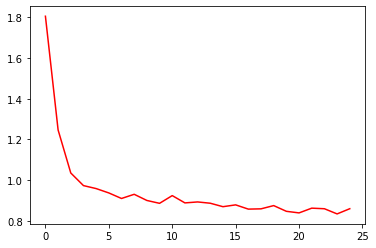

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='r')

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.

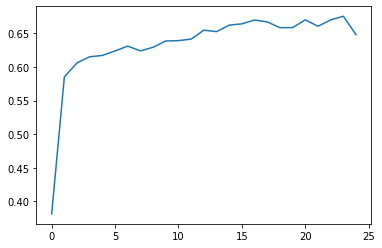

In [55]:
plt.plot(history.history['acc'])